$` f_{w,b}(x)=wx+b `$

cost function:  
$` J(w,b)=\frac{1}{2m}\displaystyle\sum_{i=1}^{m}{({f_{w,b}(x^{(i)})-y^{(i)}})^2} `$

gradient descent:  
repeat until convergence{  
- $` w=w-α\frac{∂}{∂w}J(w,b) `$  
- $` b=b-α\frac{∂}{∂w}J(w,b) `$

}

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [232]:
df = pd.read_csv('coffee.csv')

In [233]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [234]:
df.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

<Axes: >

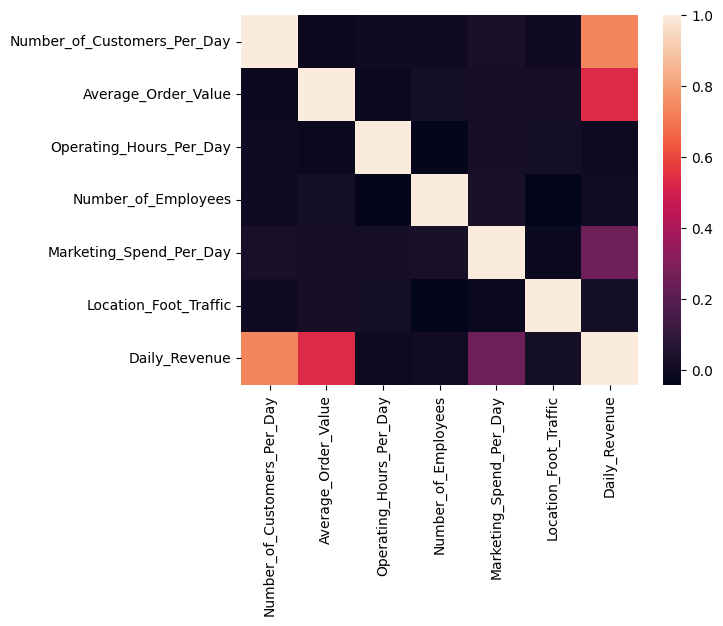

In [235]:
sns.heatmap(df.corr())

In [236]:
X = df[['Number_of_Customers_Per_Day']]
y = df['Daily_Revenue']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [238]:
model.intercept_

np.float64(404.61154638691505)

In [239]:
model.coef_

array([5.52395458])

In [240]:
mean_absolute_error(y_test,y_pred)

503.00076135647004

In [241]:
mean_squared_error(y_test,y_pred)

401391.8840212993

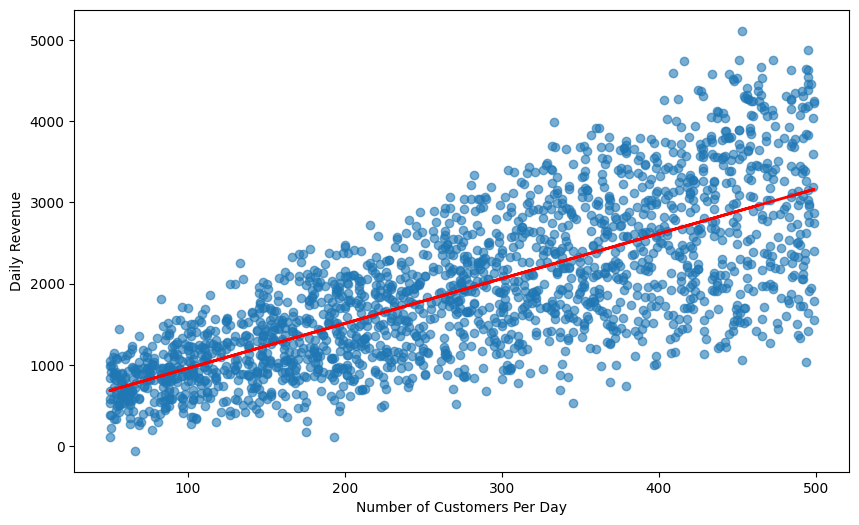

In [242]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Number of Customers Per Day')
plt.ylabel('Daily Revenue')
plt.show()

In [243]:
def get_mean(arr):
    return np.sum(arr)/len(arr)

def get_variance(arr, mean):
    return np.sum((arr-mean)**2)

def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)

def get_coefficients(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    m = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    b = y_mean - x_mean*m
    return m, b

def linear_regression(x_train, y_train, x_test, y_test):
    prediction = []
    m, b = get_coefficients(x_train, y_train)
    for x in x_test:
        y = m*x + b
        prediction.append(y)
    
    r2 = r2_score(prediction, y_test)
    mse = mean_squared_error(prediction, y_test)
    print("The R2 score of the model is: ", r2)
    print("The MSE score of the model is: ", mse)
    return prediction

prediction = linear_regression(X_train, y_train, X_test, y_test)

c:\Users\Yakina\anaconda3\envs\traineeship\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('float64'), dtype('<U27')) -> None